<a href="https://colab.research.google.com/github/Omar123511/AI_ML/blob/main/O_5_20250127_git.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import numpy as np
import keras
import tensorflow as tf
import matplotlib.pyplot as plt

from tensorflow.keras.models import Sequential, load_model


from tensorflow.keras.optimizers import Adam
from tensorflow.keras.preprocessing import image
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.callbacks import ModelCheckpoint, EarlyStopping

In [ ]:
from sklearn.model_selection import train_test_split
from tensorflow.keras.utils import to_categorical
from google.colab.patches import cv2_imshow

(x_train, y_train), (x_test, y_test) = tf.keras.datasets.cifar10.load_data()



170498071/170498071 ━━━━━━━━━━━━━━━━━━━━ 5s 0us/step


In [ ]:
y_train = to_categorical(y_train, num_classes=10)
y_test = to_categorical(y_test, num_classes=10)


train_datagen = ImageDataGenerator(
    rotation_range=20,  ###
    width_shift_range=0.2,
    height_shift_range=0.2,
    horizontal_flip=True,
    brightness_range=(0.7, 1.3),
    zoom_range=0.2,
    validation_split=0.1,           # 10% validation split
)


test_datagen = ImageDataGenerator()



train_generator = train_datagen.flow(x_train, y_train, shuffle=True, subset="training")
val_generator = train_datagen.flow(x_train, y_train, shuffle=True, subset="validation")
test_generator = test_datagen.flow(x_test, y_test)


In [ ]:
from tensorflow.keras.models import Sequential, load_model

from tensorflow.keras.layers import Input, Conv2D, MaxPool2D, MaxPooling2D, Dense, Flatten, Dropout, BatchNormalization, Activation
from tensorflow.keras.optimizers import Adam

# Generate the model
model = Sequential()
# Layer 1: Convolutional
model.add(Input(shape=(32, 32, 3)))

model.add(Conv2D(filters=64, kernel_size=(3, 3),
                 padding='same'))
model.add(Activation('relu'))
model.add(BatchNormalization())

model.add(Conv2D(filters=64, kernel_size=(3, 3),
                 padding='same'))
model.add(Activation('relu'))
model.add(BatchNormalization())

model.add(MaxPool2D(pool_size=(2, 2), strides=(2, 2)))

model.add(Conv2D(filters=128, kernel_size=(3, 3),
                 padding='same'))
model.add(Activation('relu'))
model.add(BatchNormalization())

model.add(Conv2D(filters=128, kernel_size=(3, 3),
                 padding='same'))
model.add(Activation('relu'))
model.add(BatchNormalization())

model.add(MaxPool2D(pool_size=(2, 2), strides=(2, 2)))

model.add(Conv2D(filters=256, kernel_size=(3, 3),
                 padding='same'))
model.add(Activation('relu'))
model.add(BatchNormalization())

model.add(Conv2D(filters=256, kernel_size=(3, 3),
                 padding='same'))
model.add(Activation('relu'))
model.add(BatchNormalization())

model.add(Conv2D(filters=256, kernel_size=(3, 3),
                 padding='same'))
model.add(Activation('relu'))
model.add(BatchNormalization())

model.add(MaxPool2D(pool_size=(2, 2), strides=(2, 2)))

model.add(Conv2D(filters=512, kernel_size=(3, 3),
                 padding='same'))
model.add(Activation('relu'))

model.add(BatchNormalization())


model.add(Flatten())
# Layer 20: Fully Connected Layer
model.add(Dense(units=16, activation='relu'))
model.add(BatchNormalization())

model.add(Dropout(rate=0.5))  # Another Dropout layer for regularization

# Layer 21: Fully Connected Layer
model.add(Dense(units=16, activation='relu'))
model.add(BatchNormalization())

model.add(Dropout(rate=0.5))  # Another Dropout layer for regularization

model.add(Dense(units=10, activation='softmax'))



In [ ]:
model.compile(optimizer='Adam', loss='categorical_crossentropy',
              metrics=['accuracy'])
print(model.summary())

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                      │ (None, 32, 32, 64)          │           1,792 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ activation (Activation)              │ (None, 32, 32, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization                  │ (None, 32, 32, 64)          │             256 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_1 (Conv2D)                    │ (None, 32, 32, 64)          │          36,928 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ activation_1 (Activation)            │ (None, 32, 32, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_1                │ (None, 32, 32, 64)          │             256 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d (MaxPooling2D)         │ (None, 16, 16, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_2 (Conv2D)                    │ (None, 16, 16, 128)         │          73,856 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ activation_2 (Activation)            │ (None, 16, 16, 128)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_2                │ (None, 16, 16, 128)         │             512 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_3 (Conv2D)                    │ (None, 16, 16, 128)         │         147,584 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ activation_3 (Activation)            │ (None, 16, 16, 128)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_3                │ (None, 16, 16, 128)         │             512 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_1 (MaxPooling2D)       │ (None, 8, 8, 128)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_4 (Conv2D)                    │ (None, 8, 8, 256)           │         295,168 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ activation_4 (Activation)            │ (None, 8, 8, 256)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_4                │ (None, 8, 8, 256)           │           1,024 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_5 (Conv2D)                    │ (None, 8, 8, 256)           │         590,080 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ activation_5 (Activation)            │ (None, 8, 8, 256)           │              

 Total params: 3,053,962 (11.65 MB)

 Trainable params: 3,050,570 (11.64 MB)

 Non-trainable params: 3,392 (13.25 KB)

None


In [ ]:
hist = model.fit(train_generator, validation_data=val_generator, epochs=150)

Epoch 1/150


/usr/local/lib/python3.10/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:122: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


1407/1407 ━━━━━━━━━━━━━━━━━━━━ 87s 51ms/step - accuracy: 0.1546 - loss: 2.5086 - val_accuracy: 0.2846 - val_loss: 1.8898
Epoch 2/150
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 62s 44ms/step - accuracy: 0.2716 - loss: 1.9004 - val_accuracy: 0.3036 - val_loss: 1.7398
Epoch 3/150
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 81s 43ms/step - accuracy: 0.3143 - loss: 1.7833 - val_accuracy: 0.3598 - val_loss: 1.6645
Epoch 4/150
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 60s 43ms/step - accuracy: 0.3701 - loss: 1.6735 - val_accuracy: 0.4570 - val_loss: 1.4399
Epoch 5/150
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 59s 42ms/step - accuracy: 0.4073 - loss: 1.5600 - val_accuracy: 0.4994 - val_loss: 1.3188
Epoch 6/150
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 58s 41ms/step - accuracy: 0.4580 - loss: 1.4624 - val_accuracy: 0.5292 - val_loss: 1.3478
Epoch 7/150
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 84s 43ms/step - accuracy: 0.5102 - loss: 1.3701 - val_accuracy: 0.6164 - val_loss: 1.1187
Epoch 8/150
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 81s 42ms/step - accuracy: 0.5448 - los

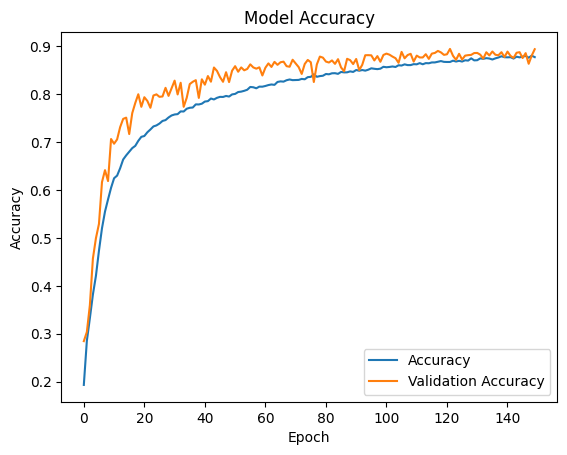

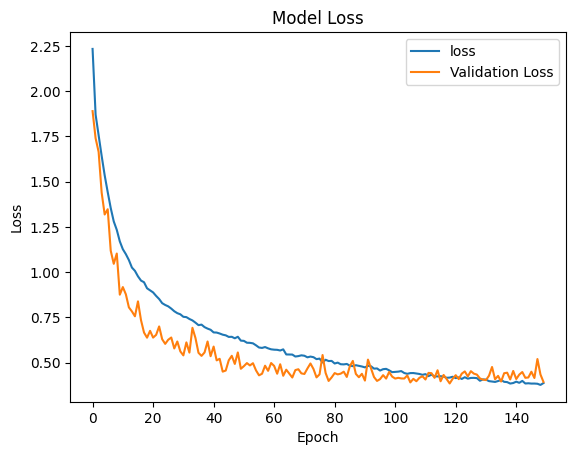

In [ ]:
##Sham's model
import matplotlib.pyplot as plt

# Assuming 'hist' is the variable that stores the training history returned by model.fit()

# Plotting accuracy and loss
plt.plot(hist.history['accuracy'], label='Accuracy')
plt.plot(hist.history['val_accuracy'], label='Validation Accuracy')
# plt.plot(hist.history['loss'], label='loss')
# plt.plot(hist.history['val_loss'], label='Validation Loss')

# Adding titles and labels
plt.title('Model Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')

# Adding a legend
plt.legend()

# Display the plot
plt.show()

################################################

# Plotting accuracy and loss
# plt.plot(hist.history['accuracy'], label='Accuracy')
# plt.plot(hist.history['val_accuracy'], label='Validation Accuracy')
plt.plot(hist.history['loss'], label='loss')
plt.plot(hist.history['val_loss'], label='Validation Loss')

# Adding titles and labels
plt.title('Model Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')

# Adding a legend
plt.legend()

# Display the plot
plt.show()

In [ ]:
##Shams' model
loss, acc = model.evaluate(test_generator, verbose=2)
print('Restored model, accuracy: {:5.2f}%'.format(100 * acc))

print(model.predict(test_generator).shape)

313/313 - 2s - 8ms/step - accuracy: 0.9071 - loss: 0.3610
Restored model, accuracy: 90.71%
313/313 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step
(10000, 10)
